# Dataset Acquisition and Exploration

## Dataset Acquisition

Dataset Link: [Rice Image Dataset](https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset)

Abstract: The Rice Image Dataset includes 75,000 images of Arborio, Basmati, Ipsala, Jasmine, and Karacadag rice varieties, with 15,000 images per variety.

## Importing dataset and libraries

In [39]:
!pip install split-folders

import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import splitfolders

from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Loading the dataset
dataset_path = r"C:\Users\M\Desktop\assignments\Deep Learning Model\Work\Dataset\dataset\Rice_Image_Dataset"

Defaulting to user installation because normal site-packages is not writeable


## Exploration through dataset

In [2]:
# Initialize variables to count classes and images
class_counts = {}
total_images = 0

# Iterate through each variety folder
for variety_folder in os.listdir(dataset_path):
    variety_path = os.path.join(dataset_path, variety_folder)
    
    # Count images in the variety folder
    num_images = len(os.listdir(variety_path))
    class_counts[variety_folder] = num_images
    
    # Increment total image count
    total_images += num_images

In [3]:
# Print class counts and total images
print("Number of Classes (Rice Varieties):", len(class_counts))
print("Class Distribution:")
for variety, count in class_counts.items():
    print(f"{variety}: {count} images")

print("Total Images in Dataset:", total_images)

Number of Classes (Rice Varieties): 5
Class Distribution:
Arborio: 15000 images
Basmati: 15000 images
Ipsala: 15000 images
Jasmine: 15000 images
Karacadag: 15000 images
Total Images in Dataset: 75000


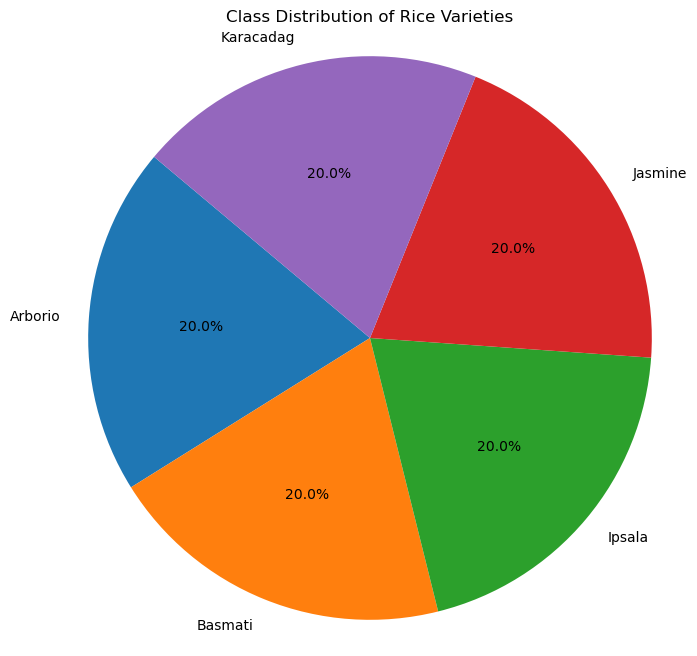

In [4]:
class_counts_df = pd.DataFrame(class_counts.items(), columns=['Variety', 'Count'])

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts_df['Count'], labels=class_counts_df['Variety'], autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution of Rice Varieties')
plt.axis('equal')
plt.show()

# Dataset Preprocessing

## Data split

In [6]:
#Define paths
input_folder = r"C:\Users\M\Desktop\assignments\Deep Learning Model\Work\Dataset\dataset\Rice_Image_Dataset"
output_folder = r"C:\Users\M\Desktop\assignments\Deep Learning Model\Work\Dataset\dataset\Rice_Split_Dataset"

#Split the dataset into train, validation, and test sets
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.8, .1, .1))

print("Dataset split into train, validation, and test sets.")


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:01,  1.17s/ files]
Copying files: 119 files [00:01, 128.78 files/s]
Copying files: 233 files [00:01, 264.22 files/s]
Copying files: 340 files [00:01, 393.27 files/s]
Copying files: 436 files [00:01, 493.73 files/s]
Copying files: 531 files [00:01, 584.40 files/s]
Copying files: 642 files [00:01, 703.21 files/s]
Copying files: 751 files [00:01, 796.78 files/s]
Copying files: 853 files [00:01, 850.87 files/s]
Copying files: 955 files [00:02, 604.45 files/s]
Copying files: 1037 files [00:02, 349.90 files/s]
Copying files: 1099 files [00:03, 282.13 files/s]
Copying files: 1147 files [00:03, 251.75 files/s]
Copying files: 1186 files [00:03, 232.99 files/s]
Copying files: 1219 files [00:03, 221.05 files/s]
Copying files: 1247 files [00:03, 210.53 files/s]
Copying files: 1272 files [00:04, 197.77 files/s]
Copying files: 1295 files [00:04, 182.65 files/s]
Copying files: 1315 files [00:04, 174.13 files/s]
Copying files: 1334 

Dataset split into train, validation, and test sets.


In [7]:
#Define the splitted paths
train_dir = r"C:\Users\M\Desktop\Contract based assignments\1-Deep Learning Model\Work\Dataset\dataset\Rice_Split_Dataset\train"
val_dir = r"C:\Users\M\Desktop\Contract based assignments\1-Deep Learning Model\Work\Dataset\dataset\Rice_Split_Dataset\val"
test_dir = r"C:\Users\M\Desktop\Contract based assignments\1-Deep Learning Model\Work\Dataset\dataset\Rice_Split_Dataset\test"

##  Specifies data augmantation

In [8]:
#Create ImageDataGenerator for preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,      #normalize pixel values to [0,1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)  #only rescale for test set

## Generate splitted data

In [9]:
#Define batch size and image size
BATCH_SIZE = 32
IMG_SIZE = (75, 75)

#Create ImageDataGenerators
train_dataset = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,  # resize images to 75x75
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode='categorical'
)

val_dataset = test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_dataset = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 60000 images belonging to 5 classes.
Found 7500 images belonging to 5 classes.
Found 7500 images belonging to 5 classes.


## Examine splitted data

In [10]:
#Determine how many batches of data are available in each set

#Calculate number of batches
num_train_batches = len(train_dataset)
num_val_batches = len(val_dataset)
num_test_batches = len(test_dataset)

#Print number of batches
print("Number of training batches:", num_train_batches)
print("Number of validation batches:", num_val_batches)
print("Number of test batches:", num_test_batches)

Number of training batches: 1875
Number of validation batches: 235
Number of test batches: 235


In [11]:
# Define class labels
class_labels = train_dataset.class_indices

# Print class indices
print("Class Indices:")
print(class_labels)

Class Indices:
{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}


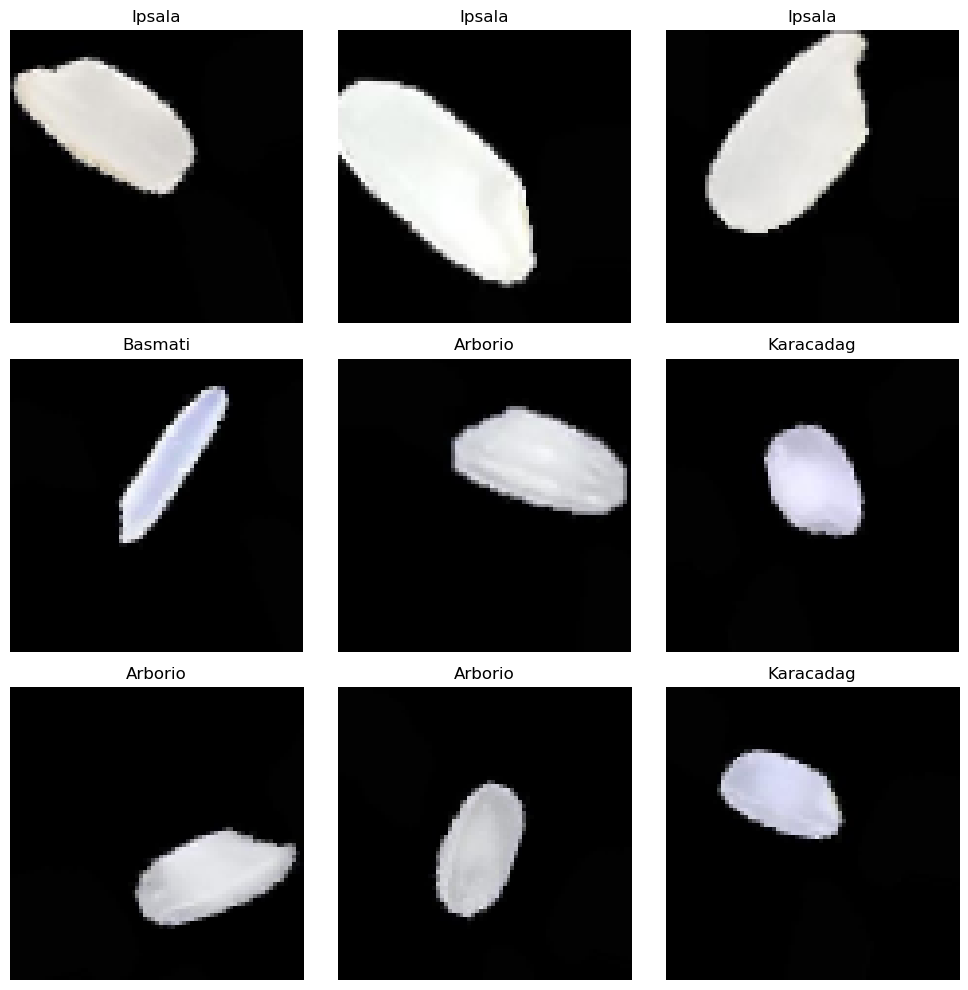

In [12]:
images, labels = next(train_dataset)

# Create a subplot with 3 rows and 3 columns for the first 9 images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    label = [key for key, value in class_labels.items() if value == labels[i].argmax()][0]
    plt.title(label)
    plt.axis("off")

plt.tight_layout()
plt.show()

# Model Implementation 

## Loading the pre-trained model

In [13]:
#Load pre-trained InceptionV3 without top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))

#Freeze the convolutional base
base_model.trainable = False

## Create the base model from the pre-trained Convolutional Neural Networks

In [14]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 1, 1, 2048)


## Building the model architecture

In [15]:
#Global Average Pooling Layer
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print("Shape after Global Average Pooling:", feature_batch_average.shape)

Shape after Global Average Pooling: (32, 2048)


In [16]:
#Define the mdoel while freezing the convolutional base
model = Sequential([
    base_model,
    global_average_layer,
    Dense(512, activation='relu'), 
    Dense(128, activation='relu'), 
    Dense(5, activation='softmax')
])

In [17]:
#Compile the model
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

#Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 22918181 (87.43 MB)
Trainable params: 1115397 (4.25 MB)
Non-trainable params: 21802784 (83.17 MB)
__________

## Train the model

In [19]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(val_dataset)

print("Initial loss: {:.2f}".format(loss0))
print("Initial accuracy: {:.2f}".format(accuracy0))



235/235 [==============================] - 59s 241ms/step - loss: 1.5824 - accuracy: 0.3281
Initial loss: 1.58
Initial accuracy: 0.33


In [20]:
history = model.fit(
    train_dataset,
    steps_per_epoch=train_dataset.samples // BATCH_SIZE,
    epochs=initial_epochs,
    validation_data=val_dataset,
    validation_steps=val_dataset.samples // BATCH_SIZE
)

Epoch 1/10
1875/1875 [==============================] - 631s 333ms/step - loss: 0.3759 - accuracy: 0.8590 - val_loss: 0.2552 - val_accuracy: 0.9085
Epoch 2/10
1875/1875 [==============================] - 314s 167ms/step - loss: 0.2710 - accuracy: 0.8965 - val_loss: 0.1982 - val_accuracy: 0.9308
Epoch 3/10
1875/1875 [==============================] - 319s 170ms/step - loss: 0.2484 - accuracy: 0.9052 - val_loss: 0.3017 - val_accuracy: 0.8948
Epoch 4/10
1875/1875 [==============================] - 311s 166ms/step - loss: 0.2352 - accuracy: 0.9104 - val_loss: 0.2550 - val_accuracy: 0.9037
Epoch 5/10
1875/1875 [==============================] - 1726s 921ms/step - loss: 0.2242 - accuracy: 0.9164 - val_loss: 0.1859 - val_accuracy: 0.9308
Epoch 6/10
1875/1875 [==============================] - 308s 164ms/step - loss: 0.2172 - accuracy: 0.9172 - val_loss: 0.1913 - val_accuracy: 0.9302
Epoch 7/10
1875/1875 [==============================] - 362s 193ms/step - loss: 0.2120 - accuracy: 0.9194 - val

In [22]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_dataset)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

235/235 [==============================] - 46s 195ms/step - loss: 0.2426 - accuracy: 0.9160
Test Loss: 0.24261786043643951
Test Accuracy: 0.9160000085830688


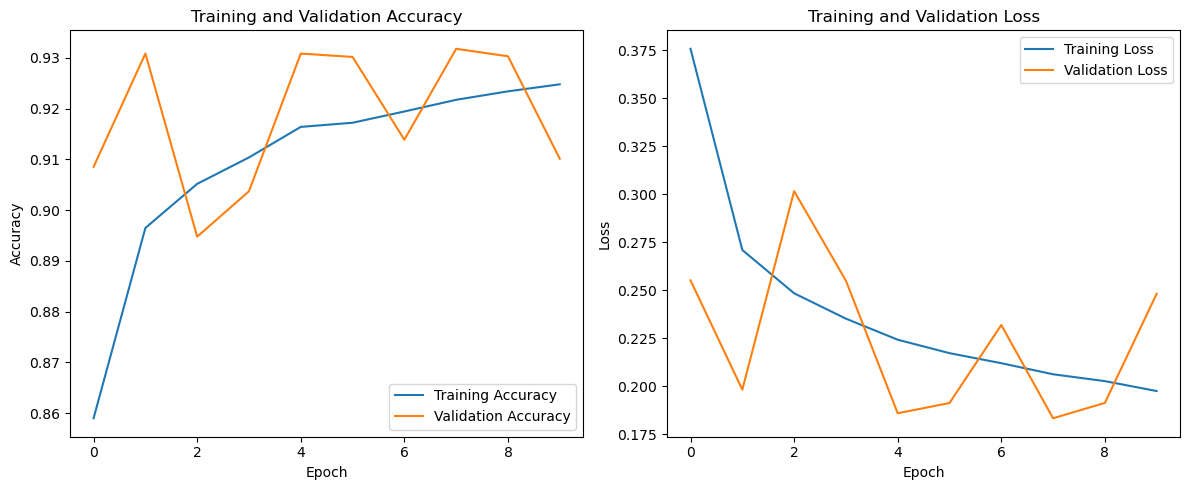

In [23]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Fine tuning

## Un-freeze the top layers of the model

In [24]:
base_model.trainable = True

In [25]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  311


In [26]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 22918181 (87.43 MB)
Trainable params: 20741765 (79.12 MB)
Non-trainable params: 2176416 (8.30 MB)
__________

In [28]:
len(model.trainable_variables)

134

## Continue training the model

In [31]:
# Fine-tuning
fine_tune_epochs = 10
total_epochs = initial_epochs + fine_tune_epochs

history_fine = model.fit(
    train_dataset,
    steps_per_epoch=train_dataset.samples // BATCH_SIZE,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1],  # Start from the last epoch of the initial training
    validation_data=val_dataset,
    validation_steps=val_dataset.samples // BATCH_SIZE
)

Epoch 10/20


Copying files: 917 files [1:36:28,  6.31s/ files]


1875/1875 [==============================] - 897s 472ms/step - loss: 0.1772 - accuracy: 0.9376 - val_loss: 0.0436 - val_accuracy: 0.9840
Epoch 11/20
1875/1875 [==============================] - 832s 444ms/step - loss: 0.0629 - accuracy: 0.9804 - val_loss: 0.0272 - val_accuracy: 0.9920
Epoch 12/20
1875/1875 [==============================] - 768s 409ms/step - loss: 0.0540 - accuracy: 0.9835 - val_loss: 0.0205 - val_accuracy: 0.9940
Epoch 13/20
1875/1875 [==============================] - 789s 421ms/step - loss: 0.0439 - accuracy: 0.9864 - val_loss: 0.0287 - val_accuracy: 0.9911
Epoch 14/20
1875/1875 [==============================] - 778s 415ms/step - loss: 0.0405 - accuracy: 0.9871 - val_loss: 0.0211 - val_accuracy: 0.9936
Epoch 15/20
1875/1875 [==============================] - 870s 464ms/step - loss: 0.0386 - accuracy: 0.9890 - val_loss: 0.0177 - val_accuracy: 0.9933
Epoch 16/20
1875/1875 [==============================] - 934s 498ms/step - loss: 0.0360 - accuracy: 0.9892 - val_loss:

In [32]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_dataset)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

235/235 [==============================] - 22s 94ms/step - loss: 0.0350 - accuracy: 0.9891
Test Loss: 0.03500089421868324
Test Accuracy: 0.9890666604042053


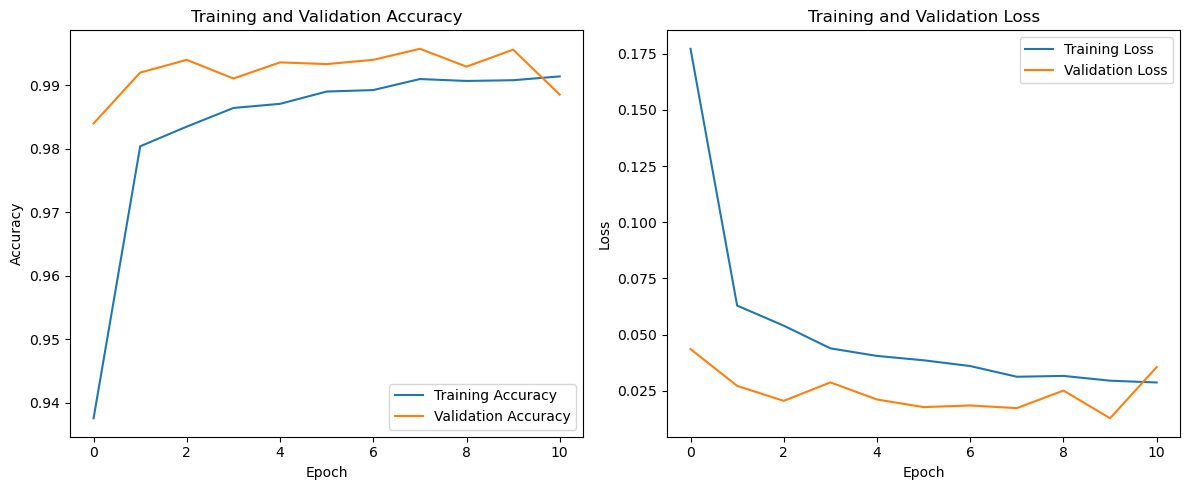

In [36]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history_fine.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history_fine.history['loss'], label='Training Loss')
plt.plot(history_fine.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Model Evaluation

In [52]:
test_loss, test_acc = model.evaluate(test_dataset)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

235/235 [==============================] - 18s 75ms/step - loss: 0.0350 - accuracy: 0.9891
Test Loss: 0.035000886768102646
Test Accuracy: 0.9890666604042053


In [57]:
predictions = model.predict(test_dataset)
true_labels = test_dataset.classes

class_names = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

#Calculate precision, recall, F1-score
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predictions.argmax(axis=1), average='weighted')

#Print results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

235/235 [==============================] - 18s 76ms/step
Precision: 0.2025851632083301
Recall: 0.20253333333333334
F1 Score: 0.20253058053054548
